In [1]:
import pygad
import numpy as np

In [2]:
from ipywidgets import IntProgress
from IPython.display import display

In [3]:
from cost_calculator_factory import CostCalculatorFactory
from multibinary_converter import MultiBinaryConverter
from multidiscrete_converter import MultiDiscreteConverter
from fitness_calculator import FitnessCalculator

In [4]:
l = 1
n = 5
m = 4
k = 3

In [5]:
M = 10 ** 6

In [6]:
T = np.array([
    [  1,   0,   0,   0],
    [0.5, 0.5,   0,   0],
    [  0, 0.5, 0.5,   0],
    [  0,   0, 0.5, 0.5],
    [  0,   0,   0,   1]
])

In [7]:
D = np.array([
    [0, 0, 1, 0],
    [0, 0, 1, 1],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
])

In [8]:
C = np.array([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1]
])

In [9]:
E = np.array([
    [1, 0, 0, 0, 0]
])

In [10]:
num_generations = 2000

sol_per_pop = 4
num_parents_mating = 2

parent_selection_type = "sss" # sss, rws, sus, rank, random, tournament

keep_parents = 1

crossover_type = "scattered" # single_point, two_points, uniform, scattered

mutation_type = "scramble" # random - не использовать, swap, inversion, scramble, adaptive

mutation_percent_genes = 10



In [11]:
class BinaryConfig:
    def __init__(self, m, k):
        self.min_value = 0
        self.max_value = 1

        self.num_genes = m * k

In [12]:
class DiscreteConfig:
    def __init__(self, m, k):
        self.min_value = 0
        self.max_value = k - 1

        self.num_genes = m

In [13]:
class Genetic:
    def __init__(self, config, fitness_calculator):
        self.config = config
        self.fitness_calculator = fitness_calculator

    def solve(self):
        
        self.ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=self.fitness_func,
                       sol_per_pop=sol_per_pop,
                       num_genes=self.config.num_genes,
                       init_range_low=self.config.min_value,
                       init_range_high=self.config.max_value + 1,
                       random_mutation_min_val=self.config.min_value,
                       random_mutation_max_val=self.config.max_value,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       on_start=self.on_start,
                       on_fitness=self.on_fitness,
                       on_parents=self.on_parents,
                       on_crossover=self.on_crossover,
                       on_mutation=self.on_mutation,
                       on_generation=self.on_generation,
                       on_stop=self.on_stop,
                       gene_type=int
        )
        self.progress = IntProgress(min=0, max=num_generations, value=0, description='genetic', bar_style='success')
        display(self.progress)
        self.ga_instance.run()
        best_solution = self.ga_instance.best_solution()
        return best_solution

    def on_start(self, ga_instance):
        pass

    def on_fitness(self, ga_instance, fitnesses):
        pass

    def on_parents(self, ga_instance, parents):
        pass

    def on_crossover(self, ga_instance, offspring):
        pass

    def on_mutation(self, ga_instance, offspring):
        pass

    def on_generation(self, ga_instance):
        self.progress.value += 1

    def on_stop(self, ga_instance, fitnesses):
        pass

    def fitness_func(self, ga_instance, solution, solution_idx):
        fitness = self.fitness_calculator.calculate(solution)
        return fitness

    def plot_fitness(self):
        self.ga_instance.plot_fitness()

In [14]:
def show_result(genetic, cost_calculator_factory, converter):
    solution, solution_fitness, solution_idx = genetic.solve() # ga_instance.best_solution()
    print('Лучшее решение')
    A = converter.convert(solution)
    print(A)
    print('Значение функции пригодности', solution_fitness)
    cost_calculator = cost_calculator_factory.get_cost_calculator(A)
    cost = cost_calculator.calculate()
    print('Стоимость', cost)
    genetic.plot_fitness()

In [15]:
cost_calculator_factory = CostCalculatorFactory(T, D, C, E)

In [16]:
# MultiBinary

In [17]:
multibinary_converter = MultiBinaryConverter(m, k)
multibinary_fitness_calculator = FitnessCalculator(cost_calculator_factory, multibinary_converter)

In [18]:
multibinary_config = BinaryConfig(m, k)

In [19]:
multibinary_genetic = Genetic(multibinary_config, multibinary_fitness_calculator)

In [20]:
# MultiDiscrete

In [21]:
multidiscrete_converter = MultiDiscreteConverter(m, k)
multidiscrete_fitness_calculator = FitnessCalculator(cost_calculator_factory, multidiscrete_converter)

In [22]:
multidiscrete_config = DiscreteConfig(m, k)

In [23]:
multidiscrete_genetic = Genetic(multidiscrete_config, multidiscrete_fitness_calculator)

C:\Users\1\AppData\Local\Programs\Python\Python312\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


IntProgress(value=0, bar_style='success', description='genetic', max=2000)

Лучшее решение
[[0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]]
Значение функции пригодности 1.0
Стоимость 1


C:\Users\1\AppData\Local\Programs\Python\Python312\Lib\site-packages\pygad\visualize\plot.py:109: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend()


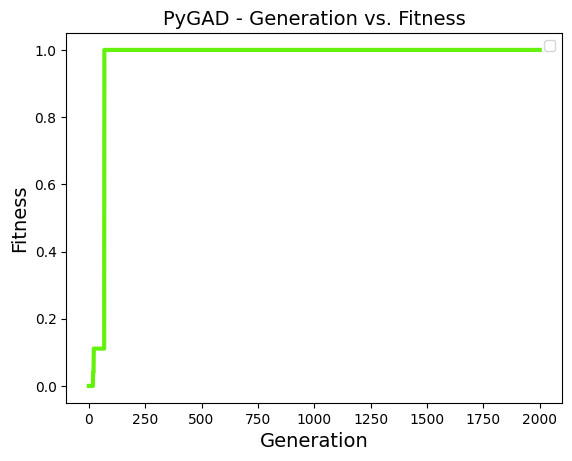

In [24]:
show_result(multibinary_genetic, cost_calculator_factory, multibinary_converter)

C:\Users\1\AppData\Local\Programs\Python\Python312\Lib\site-packages\pygad\pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")


IntProgress(value=0, bar_style='success', description='genetic', max=2000)

Лучшее решение
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
Значение функции пригодности 1.0
Стоимость 1


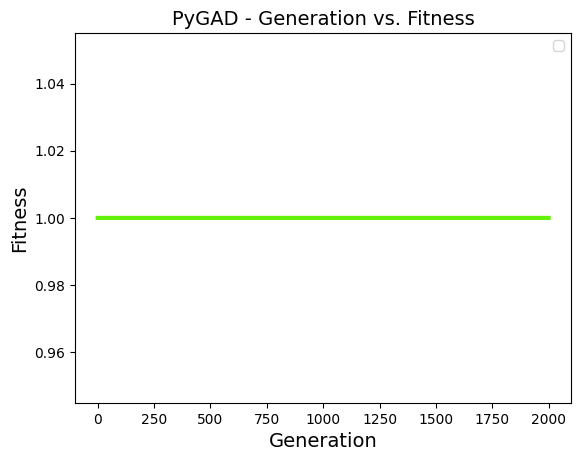

In [25]:
show_result(multidiscrete_genetic, cost_calculator_factory, multidiscrete_converter)